# Projek Akhir Project-Based Virtual Intern : Data Scientist ID/X Partners x Rakamin Academy
Nama: Imam Waliyuddin Rabbani

# Import Library

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import joblib
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Business Understanding

xxxx

# Analytic Approach

xxxx

# Data Requirements

- id = A unique LC assigned ID for the loan listing.
- member_id = A unique LC assigned Id for the borrower member.
- loan_amnt = Last month payment was received.
- funded_amnt = The total amount committed to that loan at that point in time.
- funded_amnt_inv = ?.
- term = The number of payments on the loan. Values are in months and can be either 36 or 60.
- int_rate = Indicates if income was verified by LC, not verified, or if the income source was verified.
- installment = The monthly payment owed by the borrower if the loan originates.
- grade = LC assigned loan grade.
- sub_grade = LC assigned loan subgrade.
- emp_title = The job title supplied by the Borrower when applying for the loan.*.
- emp_length = Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. .
- home_ownership = The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- annual_inc = The self-reported annual income provided by the borrower during registration.
- verification_status = ?.
- issue_d = The month which the loan was funded.
- loan_status = Current status of the loan.
- pymnt_plan = ?.
- url = URL for the LC page with listing data.
- desc = Loan description provided by the borrower.
- purpose = A category provided by the borrower for the loan request. .
- title = The loan title provided by the borrower.
- zip_code = The first 3 numbers of the zip code provided by the borrower in the loan application.
- addr_state = The state provided by the borrower in the loan application.
- dti = ?.
- delinq_2yrs = The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
- earliest_cr_line = The month the borrower's earliest reported credit line was opened.
- inq_last_6mths = The number of inquiries in past 6 months (excluding auto and mortgage inquiries).
- mths_since_last_delinq = The number of months since the borrower's last delinquency.
- mths_since_last_record = The number of months since the last public record.
- open_acc = The number of open credit lines in the borrower's credit file.
- pub_rec = Number of derogatory public records.
- revol_bal = Total credit revolving balance.
- revol_util = Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.        .
- total_acc = The total number of credit lines currently in the borrower's credit file.
- initial_list_status = The initial listing status of the loan. Possible values are – Whole, Fractional.
- out_prncp = Remaining outstanding principal for total amount funded.
- out_prncp_inv = Remaining outstanding principal for portion of total amount funded by investors.
- total_pymnt = Payments received to date for total amount funded.
- total_pymnt_inv = Payments received to date for portion of total amount funded by investors.
- total_rec_prncp = Principal received to date.
- total_rec_int = Interest received to date.
- total_rec_late_fee = Late fees received to date.
- recoveries = Indicates if a payment plan has been put in place for the loan.
- collection_recovery_fee = post charge off collection fee.
- last_pymnt_d = Last month payment was received.
- last_pymnt_amnt = Last total payment amount received.
- next_pymnt_d = Next scheduled payment date.
- last_credit_pull_d = ?.
- collections_12_mths_ex_med = Number of collections in 12 months excluding medical collections.
- mths_since_last_major_derog = Months since most recent 90-day or worse rating.
- policy_code = publicly available policy_code=1,new products not publicly available policy_code=2.
- application_type = Indicates whether the loan is an individual application or a joint application with two co-borrowers.
- annual_inc_joint = The combined self-reported annual income provided by the co-borrowers during registration.
- dti_joint = A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income.
- verification_status_joint = ?.
- acc_now_delinq = The number of accounts on which the borrower is now delinquent.
- tot_coll_amt = Total collection amounts ever owed.
- tot_cur_bal = Total current balance of all accounts.
- open_acc_6m = Number of open trades in last 6 months.
- open_il_6m = Number of installment accounts opened in past 12 months.
- open_il_12m = ?.
- open_il_24m = Number of installment accounts opened in past 24 months.
- mths_since_rcnt_il = Months since most recent installment accounts opened.
- total_bal_il = Total current balance of all installment accounts.
- il_util = Ratio of total current balance to high credit/credit limit on all install acct.
- open_rv_12m = Number of revolving trades opened in past 12 months.
- open_rv_24m = Number of revolving trades opened in past 24 months.
- max_bal_bc = Maximum current balance owed on all revolving accounts.
- all_util = Balance to credit limit on all trades.
- total_rev_hi_lim = ?.
- inq_fi = Number of personal finance inquiries.
- total_cu_tl = Number of finance trades.
- inq_last_12m = Number of credit inquiries in past 12 months.


# Data Collection

In [2]:
data = pd.read_csv("loan_data_2007_2014.csv")
data = data.drop('no', axis=1)
data = data.dropna(axis=1, how='all')
data.head()

C:\Temp\ipykernel_12672\2487989952.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("loan_data_2007_2014.csv")


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0     10.65       162.87     B        B2  ...          NaN             Jan-16   
1     15.27        59.83     C        C4  ...          NaN             Sep-13   
2     15.96        84.33     C        C5  ...          NaN             Jan-16   
3     13.49       339.31     C        C1  ...          NaN             Jan-15   
4     12.69        67.79     B        B5  ...       Feb-16             Jan-16   

  collections_12_mths_ex_med  mths_since_last_major_derog policy_code  \
0                        0.0                          NaN           1   
1                        0.0                          NaN           1   
2                        0.0                          NaN           1   
3                        0.0                          NaN           1   
4                        0.0                          NaN           1   

  application_type acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim  
0       INDIVIDUAL            0.0          NaN         NaN              NaN  
1       INDIVIDUAL            0.0          NaN         NaN              NaN  
2       INDIVIDUAL            0.0          NaN         NaN              NaN  
3       INDIVIDUAL            0.0          NaN         NaN              NaN  
4       INDIVIDUAL            0.0          NaN         NaN              NaN  

[5 rows x 57 columns]

# Data Understanding

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [4]:
data.shape

(466285, 57)

In [5]:
data.describe()

id     member_id      loan_amnt    funded_amnt  \
count  4.662850e+05  4.662850e+05  466285.000000  466285.000000   
mean   1.307973e+07  1.459766e+07   14317.277577   14291.801044   
std    1.089371e+07  1.168237e+07    8286.509164    8274.371300   
min    5.473400e+04  7.047300e+04     500.000000     500.000000   
25%    3.639987e+06  4.379705e+06    8000.000000    8000.000000   
50%    1.010790e+07  1.194108e+07   12000.000000   12000.000000   
75%    2.073121e+07  2.300154e+07   20000.000000   20000.000000   
max    3.809811e+07  4.086083e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    466285.000000  466285.000000  466285.000000  4.662810e+05   
mean      14222.329888      13.829236     432.061201  7.327738e+04   
std        8297.637788       4.357587     243.485550  5.496357e+04   
min           0.000000       5.420000      15.670000  1.896000e+03   
25%        8000.000000      10.990000     256.690000  4.500000e+04   
50%       12000.000000      13.660000     379.890000  6.300000e+04   
75%       19950.000000      16.490000     566.580000  8.896000e+04   
max       35000.000000      26.060000    1409.990000  7.500000e+06   

                 dti    delinq_2yrs  ...     recoveries  \
count  466285.000000  466256.000000  ...  466285.000000   
mean       17.218758       0.284678  ...      85.344211   
std         7.851121       0.797365  ...     552.216084   
min         0.000000       0.000000  ...       0.000000   
25%        11.360000       0.000000  ...       0.000000   
50%        16.870000       0.000000  ...       0.000000   
75%        22.780000       0.000000  ...       0.000000   
max        39.990000      29.000000  ...   33520.270000   

       collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
count            466285.000000    466285.000000               466140.000000   
mean                  8.961534      3123.913796                    0.009085   
std                  85.491437      5554.737393                    0.108648   
min                   0.000000         0.000000                    0.000000   
25%                   0.000000       312.620000                    0.000000   
50%                   0.000000       545.960000                    0.000000   
75%                   0.000000      3187.510000                    0.000000   
max                7002.190000     36234.440000                   20.000000   

       mths_since_last_major_derog  policy_code  acc_now_delinq  tot_coll_amt  \
count                 98974.000000     466285.0   466256.000000  3.960090e+05   
mean                     42.852547          1.0        0.004002  1.919135e+02   
std                      21.662591          0.0        0.068637  1.463021e+04   
min                       0.000000          1.0        0.000000  0.000000e+00   
25%                      26.000000          1.0        0.000000  0.000000e+00   
50%                      42.000000          1.0        0.000000  0.000000e+00   
75%                      59.000000          1.0        0.000000  0.000000e+00   
max                     188.000000          1.0        5.000000  9.152545e+06   

        tot_cur_bal  total_rev_hi_lim  
count  3.960090e+05      3.960090e+05  
mean   1.388017e+05      3.037909e+04  
std    1.521147e+05      3.724713e+04  
min    0.000000e+00      0.000000e+00  
25%    2.861800e+04      1.350000e+04  
50%    8.153900e+04      2.280000e+04  
75%    2.089530e+05      3.790000e+04  
max    8.000078e+06      9.999999e+06  

[8 rows x 35 columns]

In [6]:
data.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [7]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim

# Data Preparation

In [8]:
column_counts = data.count()
selected_columns = column_counts[column_counts > 400000].index
new_data = data[selected_columns]

In [9]:
data_cleaned = new_data.dropna()
data_cleaned.reset_index(drop=True, inplace=True)
data_cleaned.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077430    1314167       2500         2500           2500.0   60 months   
1  1076863    1277178      10000        10000          10000.0   36 months   
2  1075358    1311748       3000         3000           3000.0   60 months   
3  1075269    1311441       5000         5000           5000.0   36 months   
4  1069639    1304742       7000         7000           7000.0   60 months   

   int_rate  installment grade sub_grade  ... total_rec_late_fee recoveries  \
0     15.27        59.83     C        C4  ...               0.00     117.08   
1     13.49       339.31     C        C1  ...              16.97       0.00   
2     12.69        67.79     B        B5  ...               0.00       0.00   
3      7.90       156.46     A        A4  ...               0.00       0.00   
4     15.96       170.08     C        C5  ...               0.00       0.00   

  collection_recovery_fee  last_pymnt_d last_pymnt_amnt last_credit_pull_d  \
0                    1.11        Apr-13          119.66             Sep-13   
1                    0.00        Jan-15          357.48             Jan-15   
2                    0.00        Jan-16           67.79             Jan-16   
3                    0.00        Jan-15          161.03             Sep-15   
4                    0.00        Jan-16          170.08             Jan-16   

  collections_12_mths_ex_med policy_code application_type acc_now_delinq  
0                        0.0           1       INDIVIDUAL            0.0  
1                        0.0           1       INDIVIDUAL            0.0  
2                        0.0           1       INDIVIDUAL            0.0  
3                        0.0           1       INDIVIDUAL            0.0  
4                        0.0           1       INDIVIDUAL            0.0  

[5 rows x 49 columns]

In [10]:
data_cleaned = data_cleaned.drop(columns=['id','member_id','emp_title','issue_d','url','title','zip_code','addr_state','earliest_cr_line','last_pymnt_d','last_credit_pull_d','policy_code','application_type'])

In [11]:
loan_status_mapping = {
    'Fully Paid': 0, 
    'Does not meet the credit policy. Status:Fully Paid': 0, 
    'Current': 1, 
    'Charged Off': 2, 
    'Does not meet the credit policy. Status:Charged Off':2, 
    'Default': 3, 
    'Late (16-30 days)': 4, 
    'Late (31-120 days)': 4,
    'In Grace Period': 5 
}
data_cleaned['loan_status'] = data_cleaned['loan_status'].replace(loan_status_mapping)

In [12]:
object_columns = data_cleaned.select_dtypes(include=['object'])

for col in object_columns.columns:
    unique_values = data_cleaned[col].unique()
    text_to_numeric = {value: index for index, value in enumerate(unique_values)}
    data_cleaned[col] = data_cleaned[col].replace(text_to_numeric)

In [13]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437709 entries, 0 to 437708
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   437709 non-null  int64  
 1   funded_amnt                 437709 non-null  int64  
 2   funded_amnt_inv             437709 non-null  float64
 3   term                        437709 non-null  int64  
 4   int_rate                    437709 non-null  float64
 5   installment                 437709 non-null  float64
 6   grade                       437709 non-null  int64  
 7   sub_grade                   437709 non-null  int64  
 8   emp_length                  437709 non-null  int64  
 9   home_ownership              437709 non-null  int64  
 10  annual_inc                  437709 non-null  float64
 11  verification_status         437709 non-null  int64  
 12  loan_status                 437709 non-null  int64  
 13  pymnt_plan    

In [14]:
data_cleaned.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0       2500         2500           2500.0     0     15.27        59.83   
1      10000        10000          10000.0     1     13.49       339.31   
2       3000         3000           3000.0     0     12.69        67.79   
3       5000         5000           5000.0     1      7.90       156.46   
4       7000         7000           7000.0     0     15.96       170.08   

   grade  sub_grade  emp_length  home_ownership  ...   total_pymnt  \
0      0          0           0               0  ...   1008.710000   
1      0          1           1               0  ...  12226.302210   
2      1          2           2               0  ...   3242.170000   
3      2          3           3               0  ...   5631.377753   
4      0          4           4               0  ...   8136.840000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          1008.71           456.46         435.17                0.00   
1         12226.30         10000.00        2209.33               16.97   
2          3242.17          2233.10        1009.07                0.00   
3          5631.38          5000.00         631.38                0.00   
4          8136.84          5110.85        3025.99                0.00   

   recoveries  collection_recovery_fee  last_pymnt_amnt  \
0      117.08                     1.11           119.66   
1        0.00                     0.00           357.48   
2        0.00                     0.00            67.79   
3        0.00                     0.00           161.03   
4        0.00                     0.00           170.08   

   collections_12_mths_ex_med  acc_now_delinq  
0                         0.0             0.0  
1                         0.0             0.0  
2                         0.0             0.0  
3                         0.0             0.0  
4                         0.0             0.0  

[5 rows x 36 columns]

# Exploratory Data Analysis

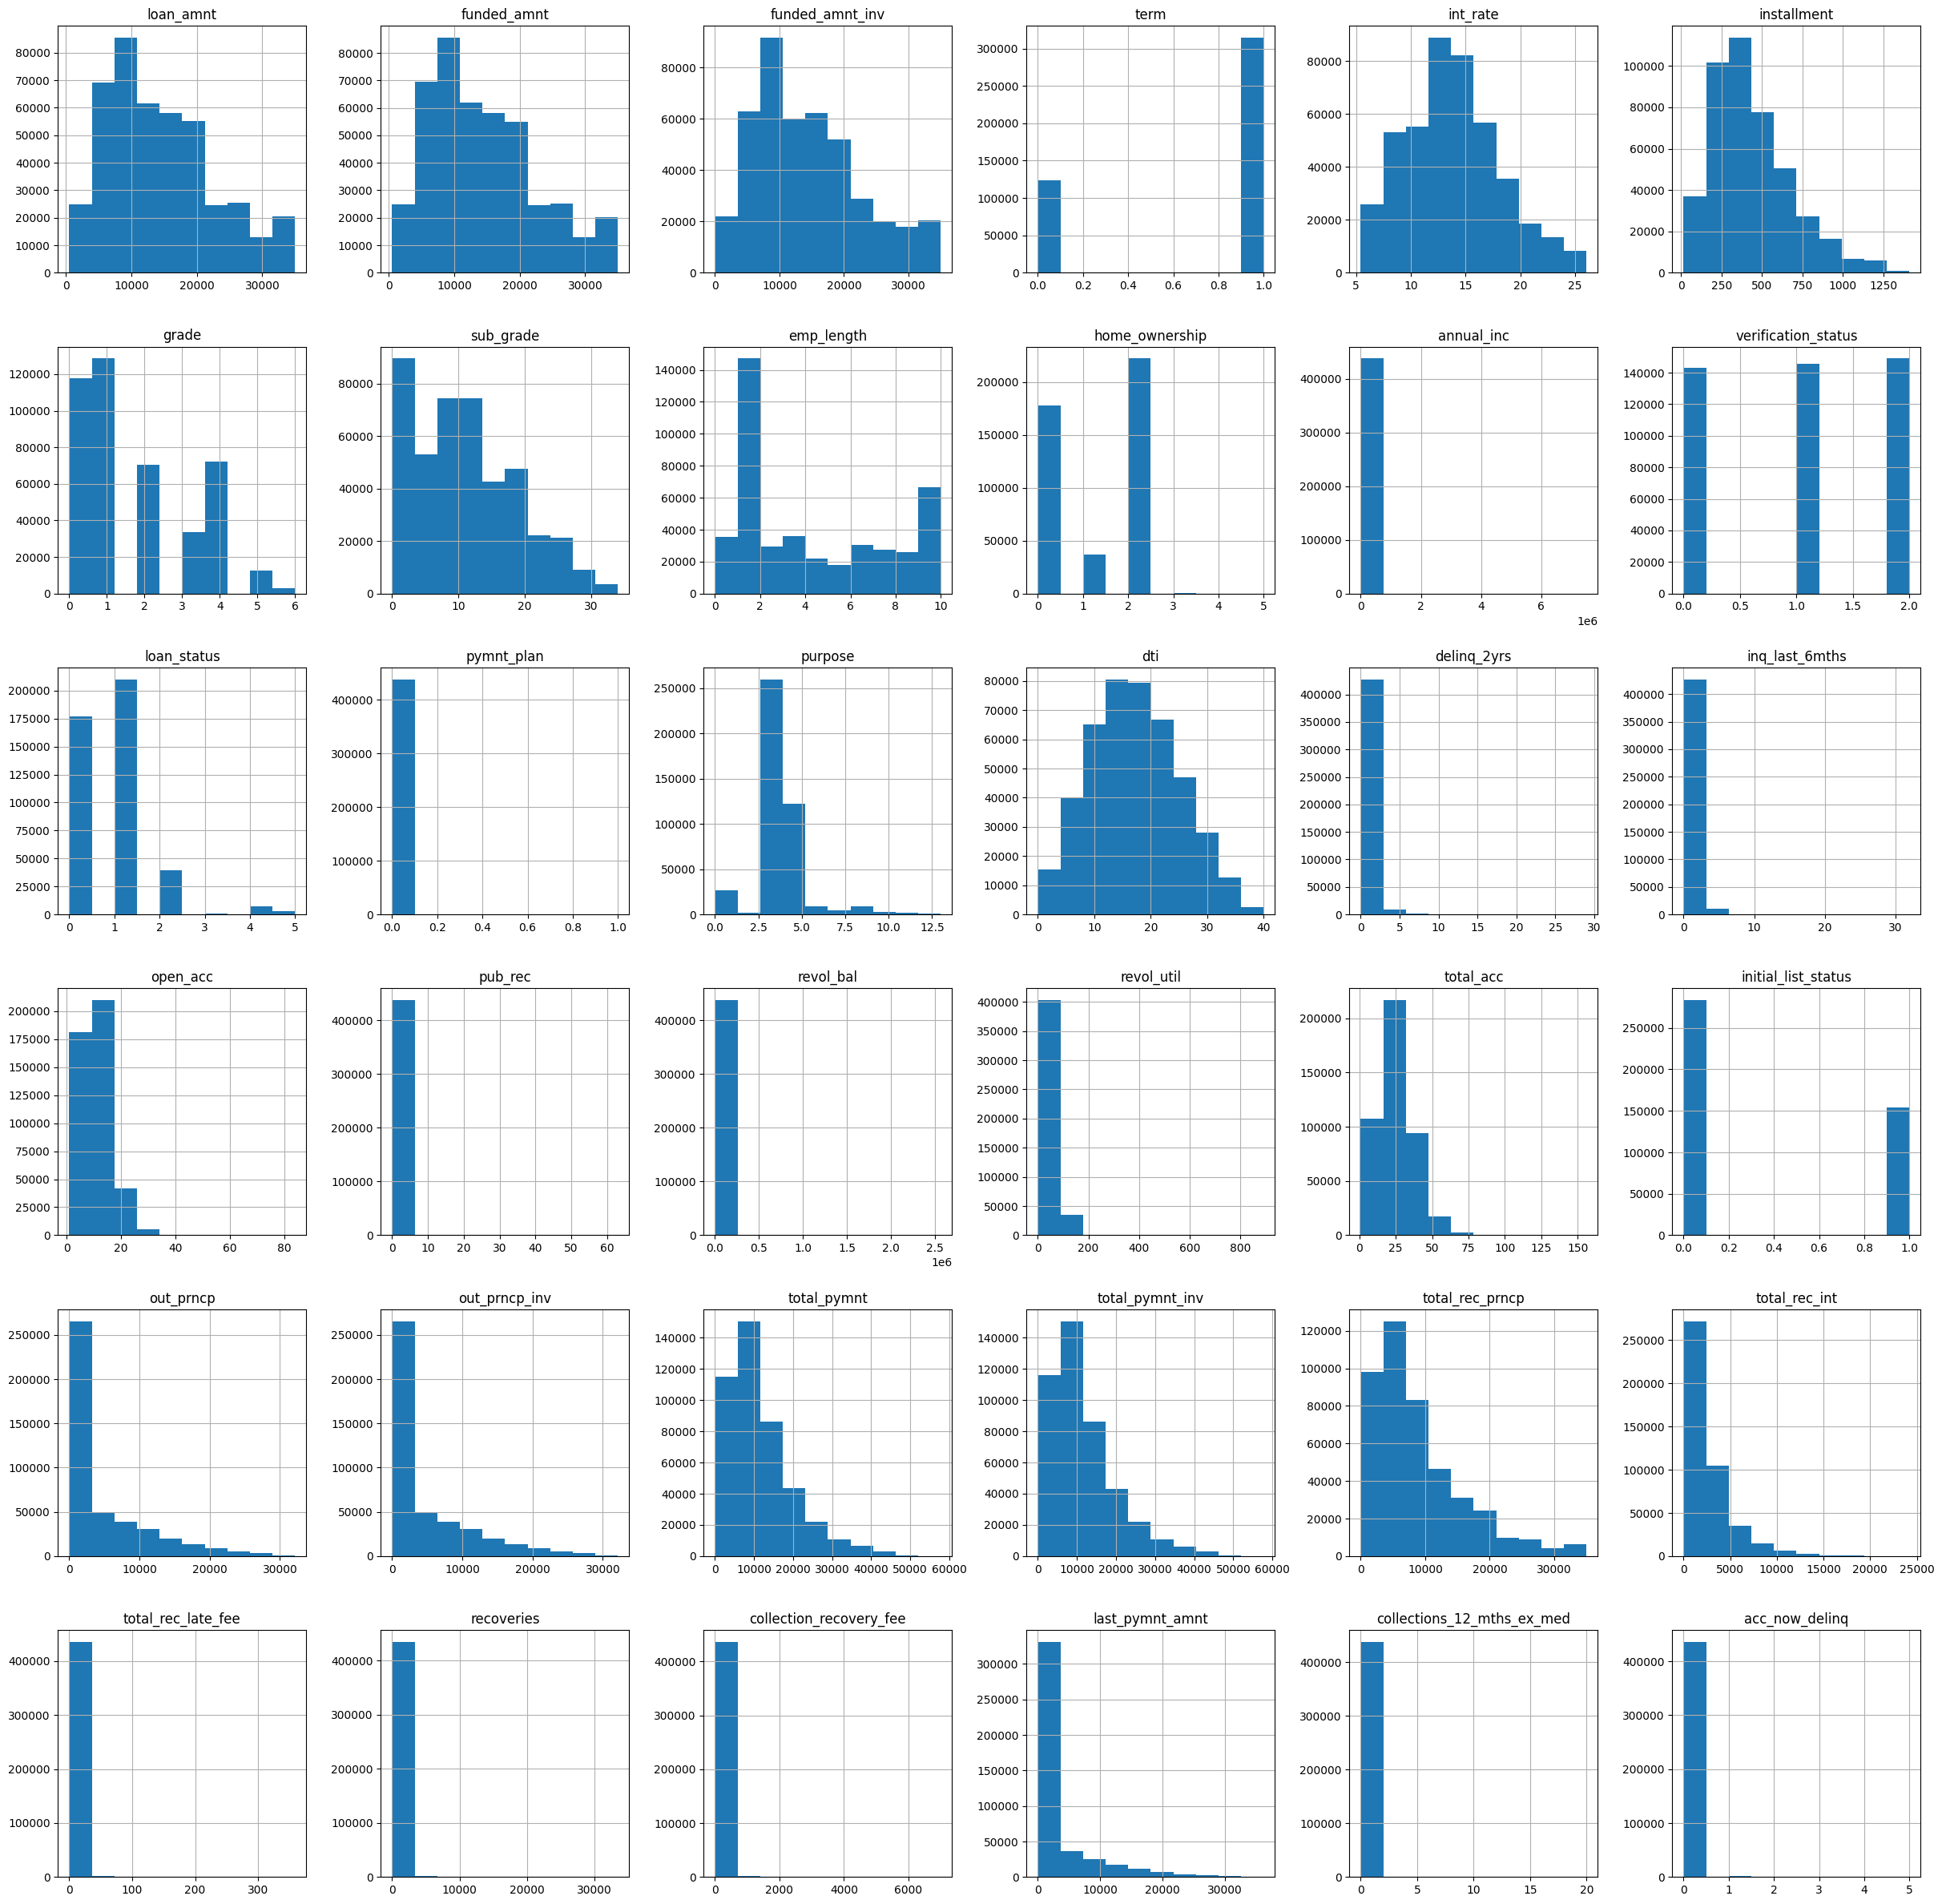

In [15]:
df_hist =data_cleaned.copy()
df_hist.hist(figsize=(30,30))
plt.show()

In [16]:
data_cleaned = data_cleaned.drop(columns=['annual_inc','pymnt_plan','pub_rec','revol_bal','total_rec_late_fee','recoveries','collection_recovery_fee','collections_12_mths_ex_med','acc_now_delinq','delinq_2yrs','inq_last_6mths'])

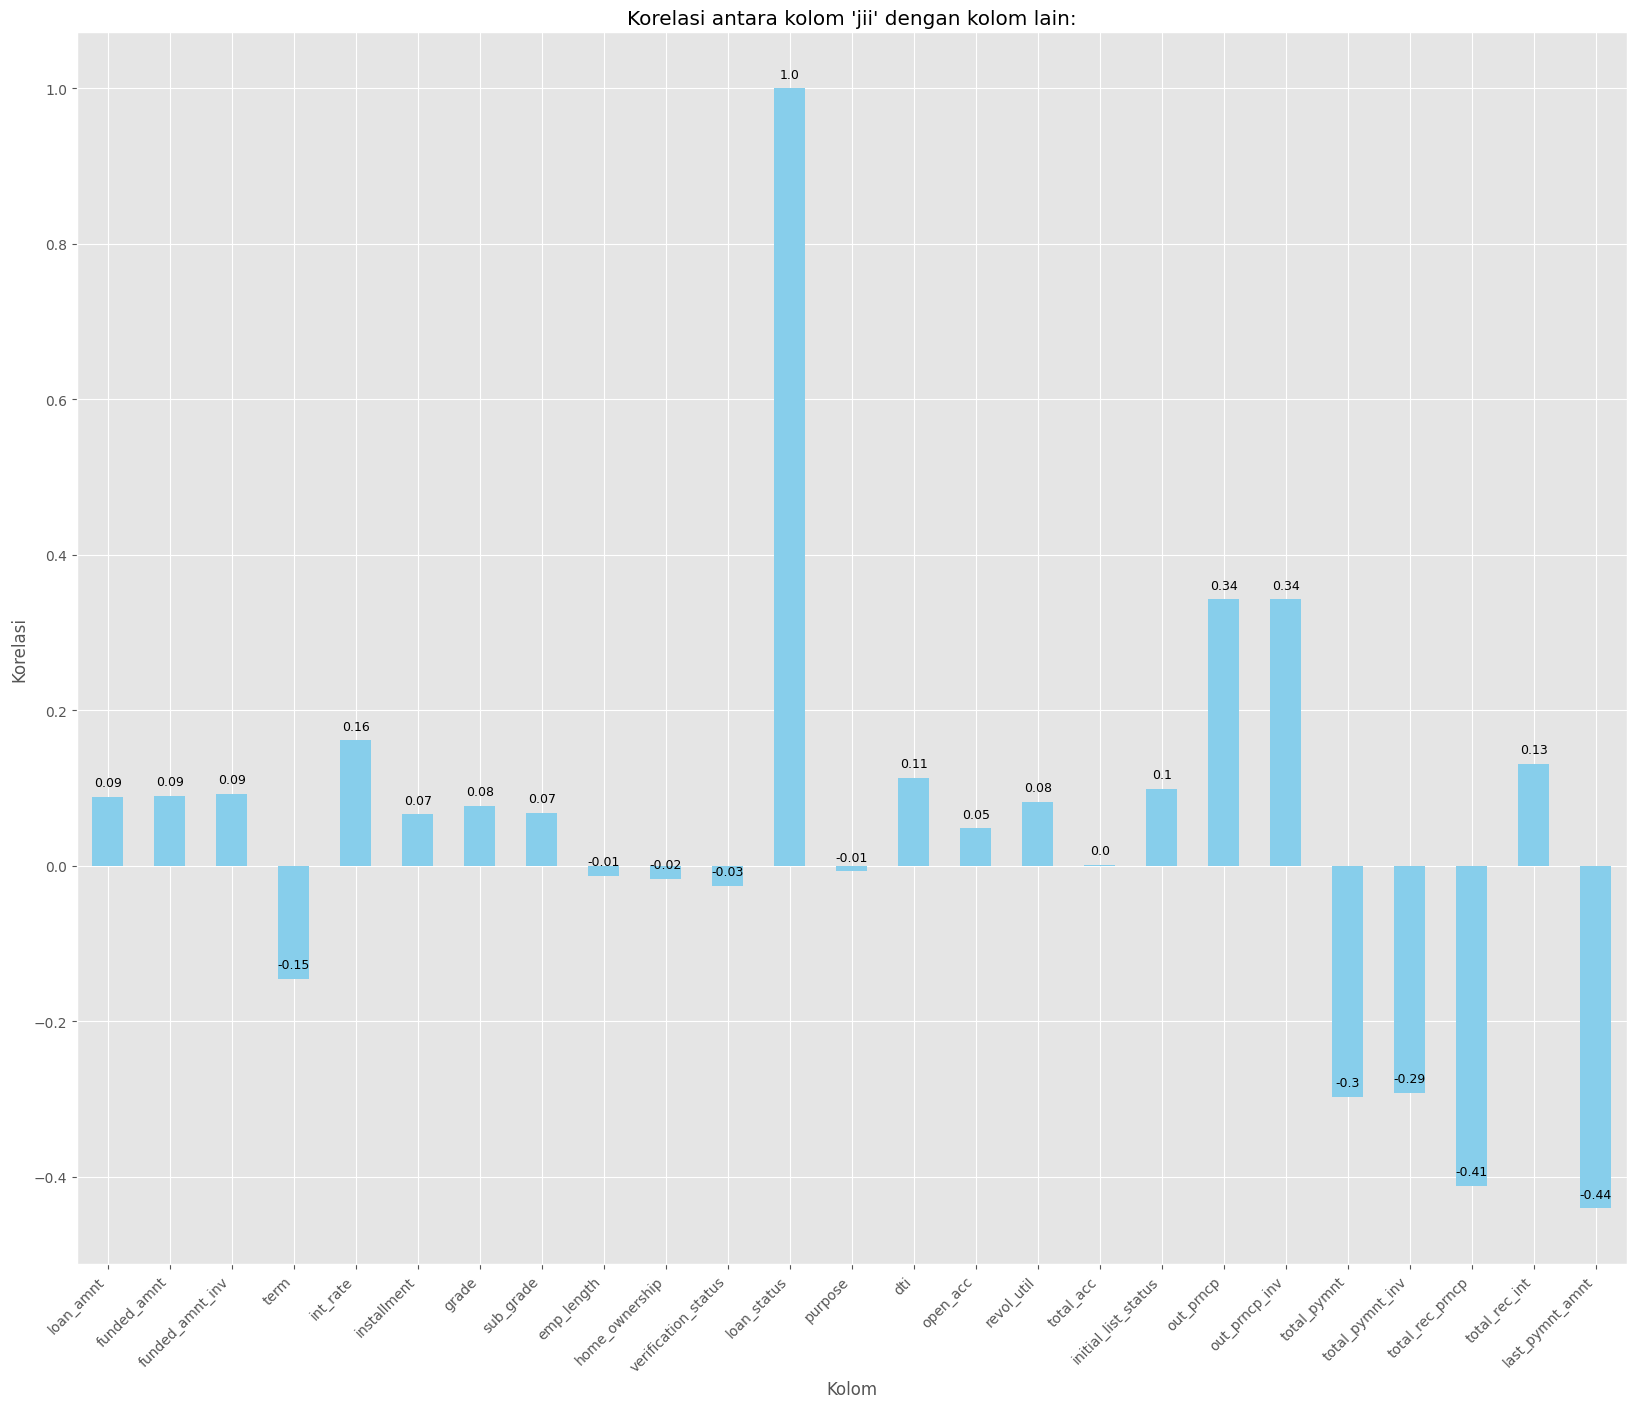

In [17]:
correlation = data_cleaned.corrwith(data_cleaned['loan_status'])

plt.figure(figsize=(20, 16))
plt.style.use('ggplot')

ax = correlation.plot(kind='bar', color='skyblue')
plt.title("Korelasi antara kolom '{}' dengan kolom lain:".format('jii'))
plt.xlabel('Kolom')
plt.ylabel('Korelasi')

plt.xticks(rotation=45, ha="right")

for i, v in enumerate(correlation):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=9)

plt.show()

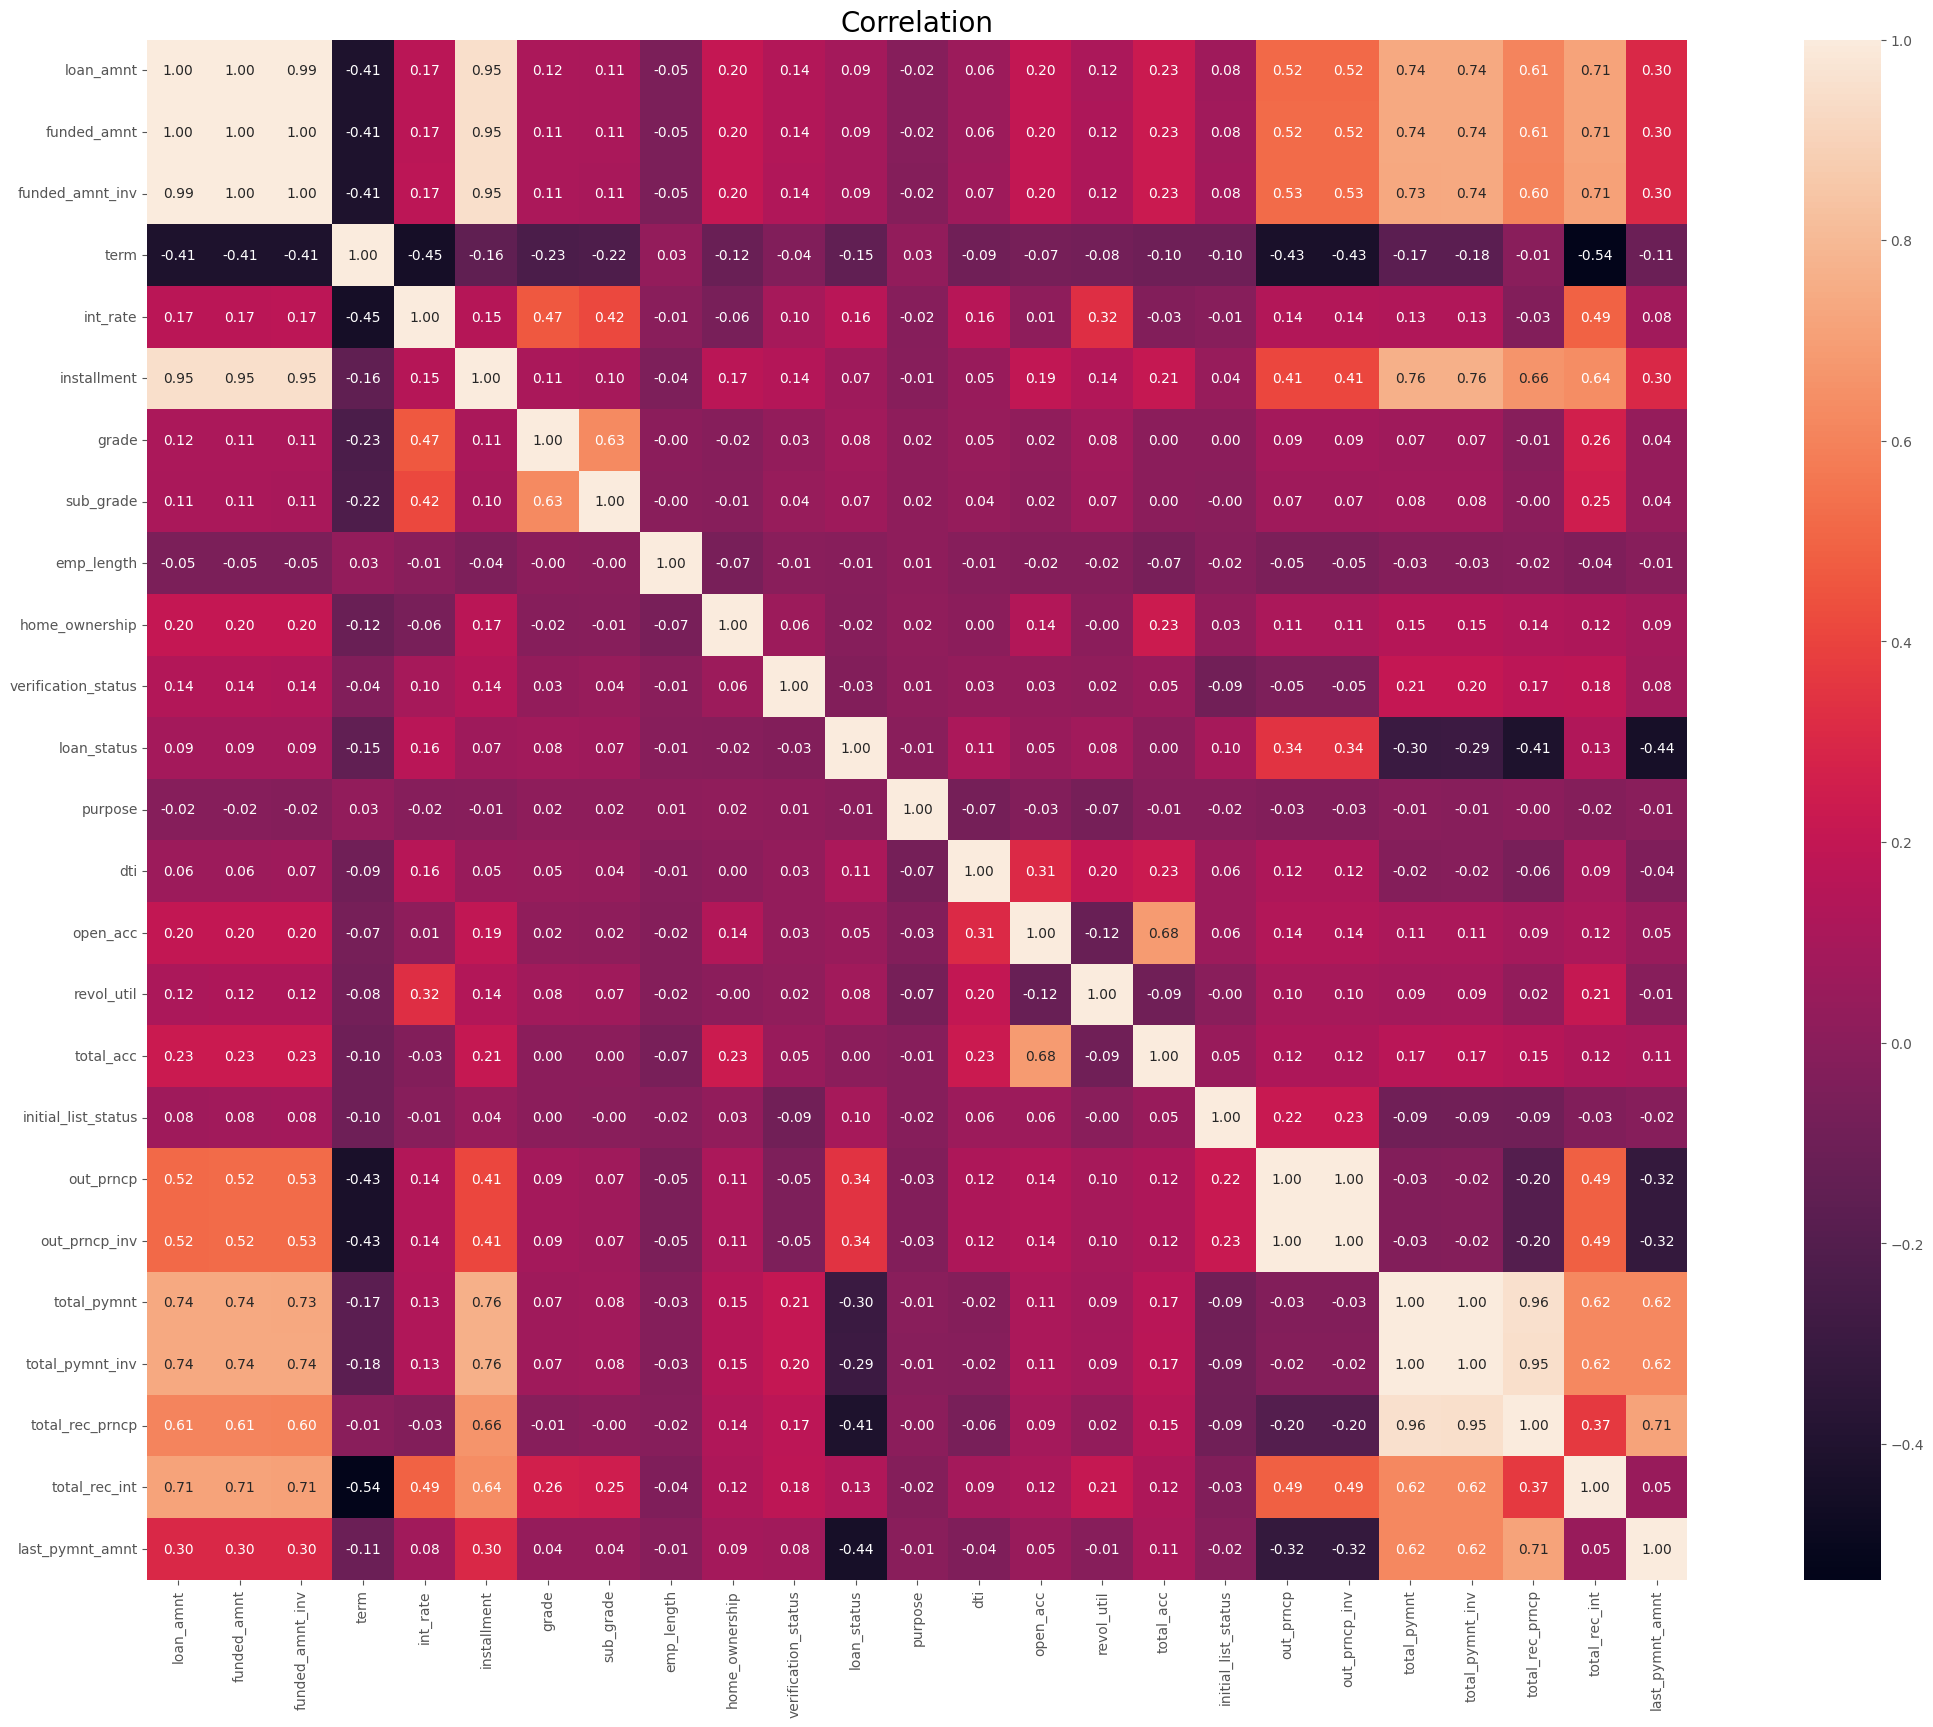

In [18]:
plt.figure(figsize = (30,20))
sns.heatmap(data_cleaned.corr(), annot=True, square=True, fmt='.2f')
plt.title('Correlation', fontsize = 20)
plt.show()

In [19]:
fig = px.histogram(data_cleaned, x="loan_status")
fig.update_layout(bargap=0.7)
fig.show()

# Model Building

In [22]:
columns_to_normalize = [col for col in data_cleaned.columns if col != 'loan_status']
scaler = MinMaxScaler(feature_range=(-1, 1))
data_cleaned[columns_to_normalize] = scaler.fit_transform(data_cleaned[columns_to_normalize])

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [91]:
x= data_cleaned.copy()
x.drop('loan_status',axis = 1,inplace = True)
x = x.to_numpy()
y = data_cleaned['loan_status']
y=y.to_numpy()

In [92]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [93]:
X_train.shape, X_val.shape, X_test.shape

((262625, 24), (87542, 24), (87542, 24))

In [94]:
y_train = keras.utils.to_categorical(y_train, 6)
y_val = keras.utils.to_categorical(y_val, 6)

## Training

In [48]:
model = keras.Sequential([
    layers.Input(shape=(24,)), 
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2,verbose=2)

Epoch 1/5
6566/6566 - 34s - loss: 0.2608 - accuracy: 0.9321 - val_loss: 0.1687 - val_accuracy: 0.9595 - 34s/epoch - 5ms/step
Epoch 2/5
6566/6566 - 31s - loss: 0.1845 - accuracy: 0.9561 - val_loss: 0.1754 - val_accuracy: 0.9532 - 31s/epoch - 5ms/step
Epoch 3/5
6566/6566 - 31s - loss: 0.1770 - accuracy: 0.9583 - val_loss: 0.1500 - val_accuracy: 0.9652 - 31s/epoch - 5ms/step
Epoch 4/5
6566/6566 - 31s - loss: 0.1712 - accuracy: 0.9593 - val_loss: 0.1604 - val_accuracy: 0.9619 - 31s/epoch - 5ms/step
Epoch 5/5
6566/6566 - 31s - loss: 0.1692 - accuracy: 0.9596 - val_loss: 0.1491 - val_accuracy: 0.9642 - 31s/epoch - 5ms/step


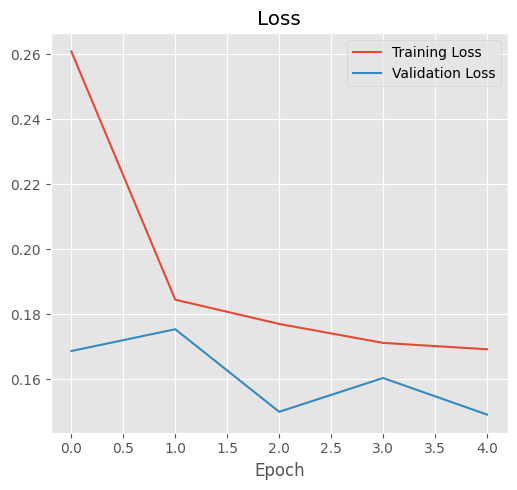

In [50]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.tight_layout()
plt.show()

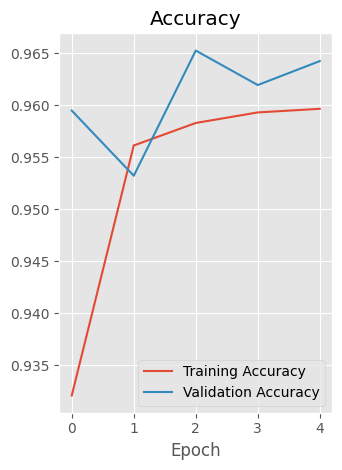

In [53]:
train_accuracy = history.history['accuracy']  
val_accuracy = history.history['val_accuracy']
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)

plt.tight_layout()
plt.show()

## Testing

In [55]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}')

2736/2736 [==============================] - 9s 3ms/step - loss: 0.1501 - accuracy: 0.9645
Validation Loss: 0.15, Validation Accuracy: 0.96


# Model Evaluation

In [95]:
y_pred = model.predict(X_test)

2736/2736 [==============================] - 8s 3ms/step


In [98]:
y_predict = np.argmax(y_pred, axis=1)

In [104]:
y_test[0]

0

In [105]:
y_predict[0]

0

In [108]:
accuracy = accuracy_score(y_test, y_predict)

cm = confusion_matrix(y_test, y_predict)

report = classification_report(y_test, y_predict, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35439
           1       0.94      0.99      0.97     41874
           2       1.00      0.94      0.97      8001
           3       1.00      0.00      0.00       140
           4       1.00      0.00      0.00      1513
           5       1.00      0.00      0.00       575

    accuracy                           0.96     87542
   macro avg       0.99      0.49      0.49     87542
weighted avg       0.97      0.96      0.95     87542



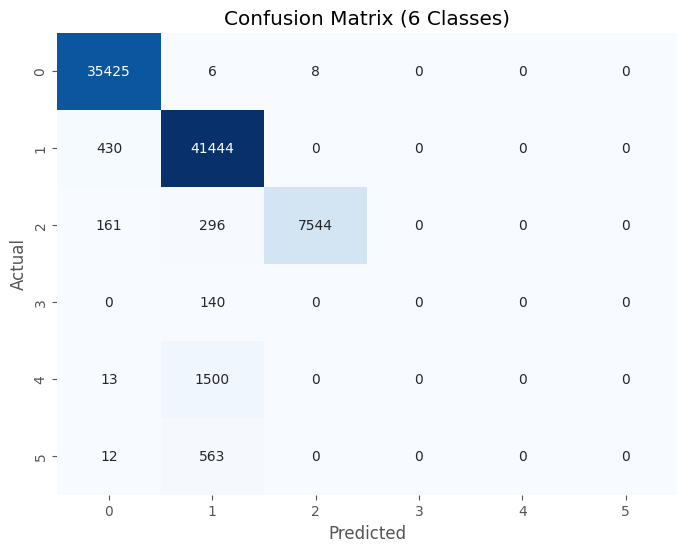

In [112]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (6 Classes)")
plt.show()

# Model Deployment

In [113]:
model.save("my_model.h5")

c:\Users\onlym\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



Github Repo: https://github.com/ImamWaliyuddin/Data-Scientist-ID-X-Partners

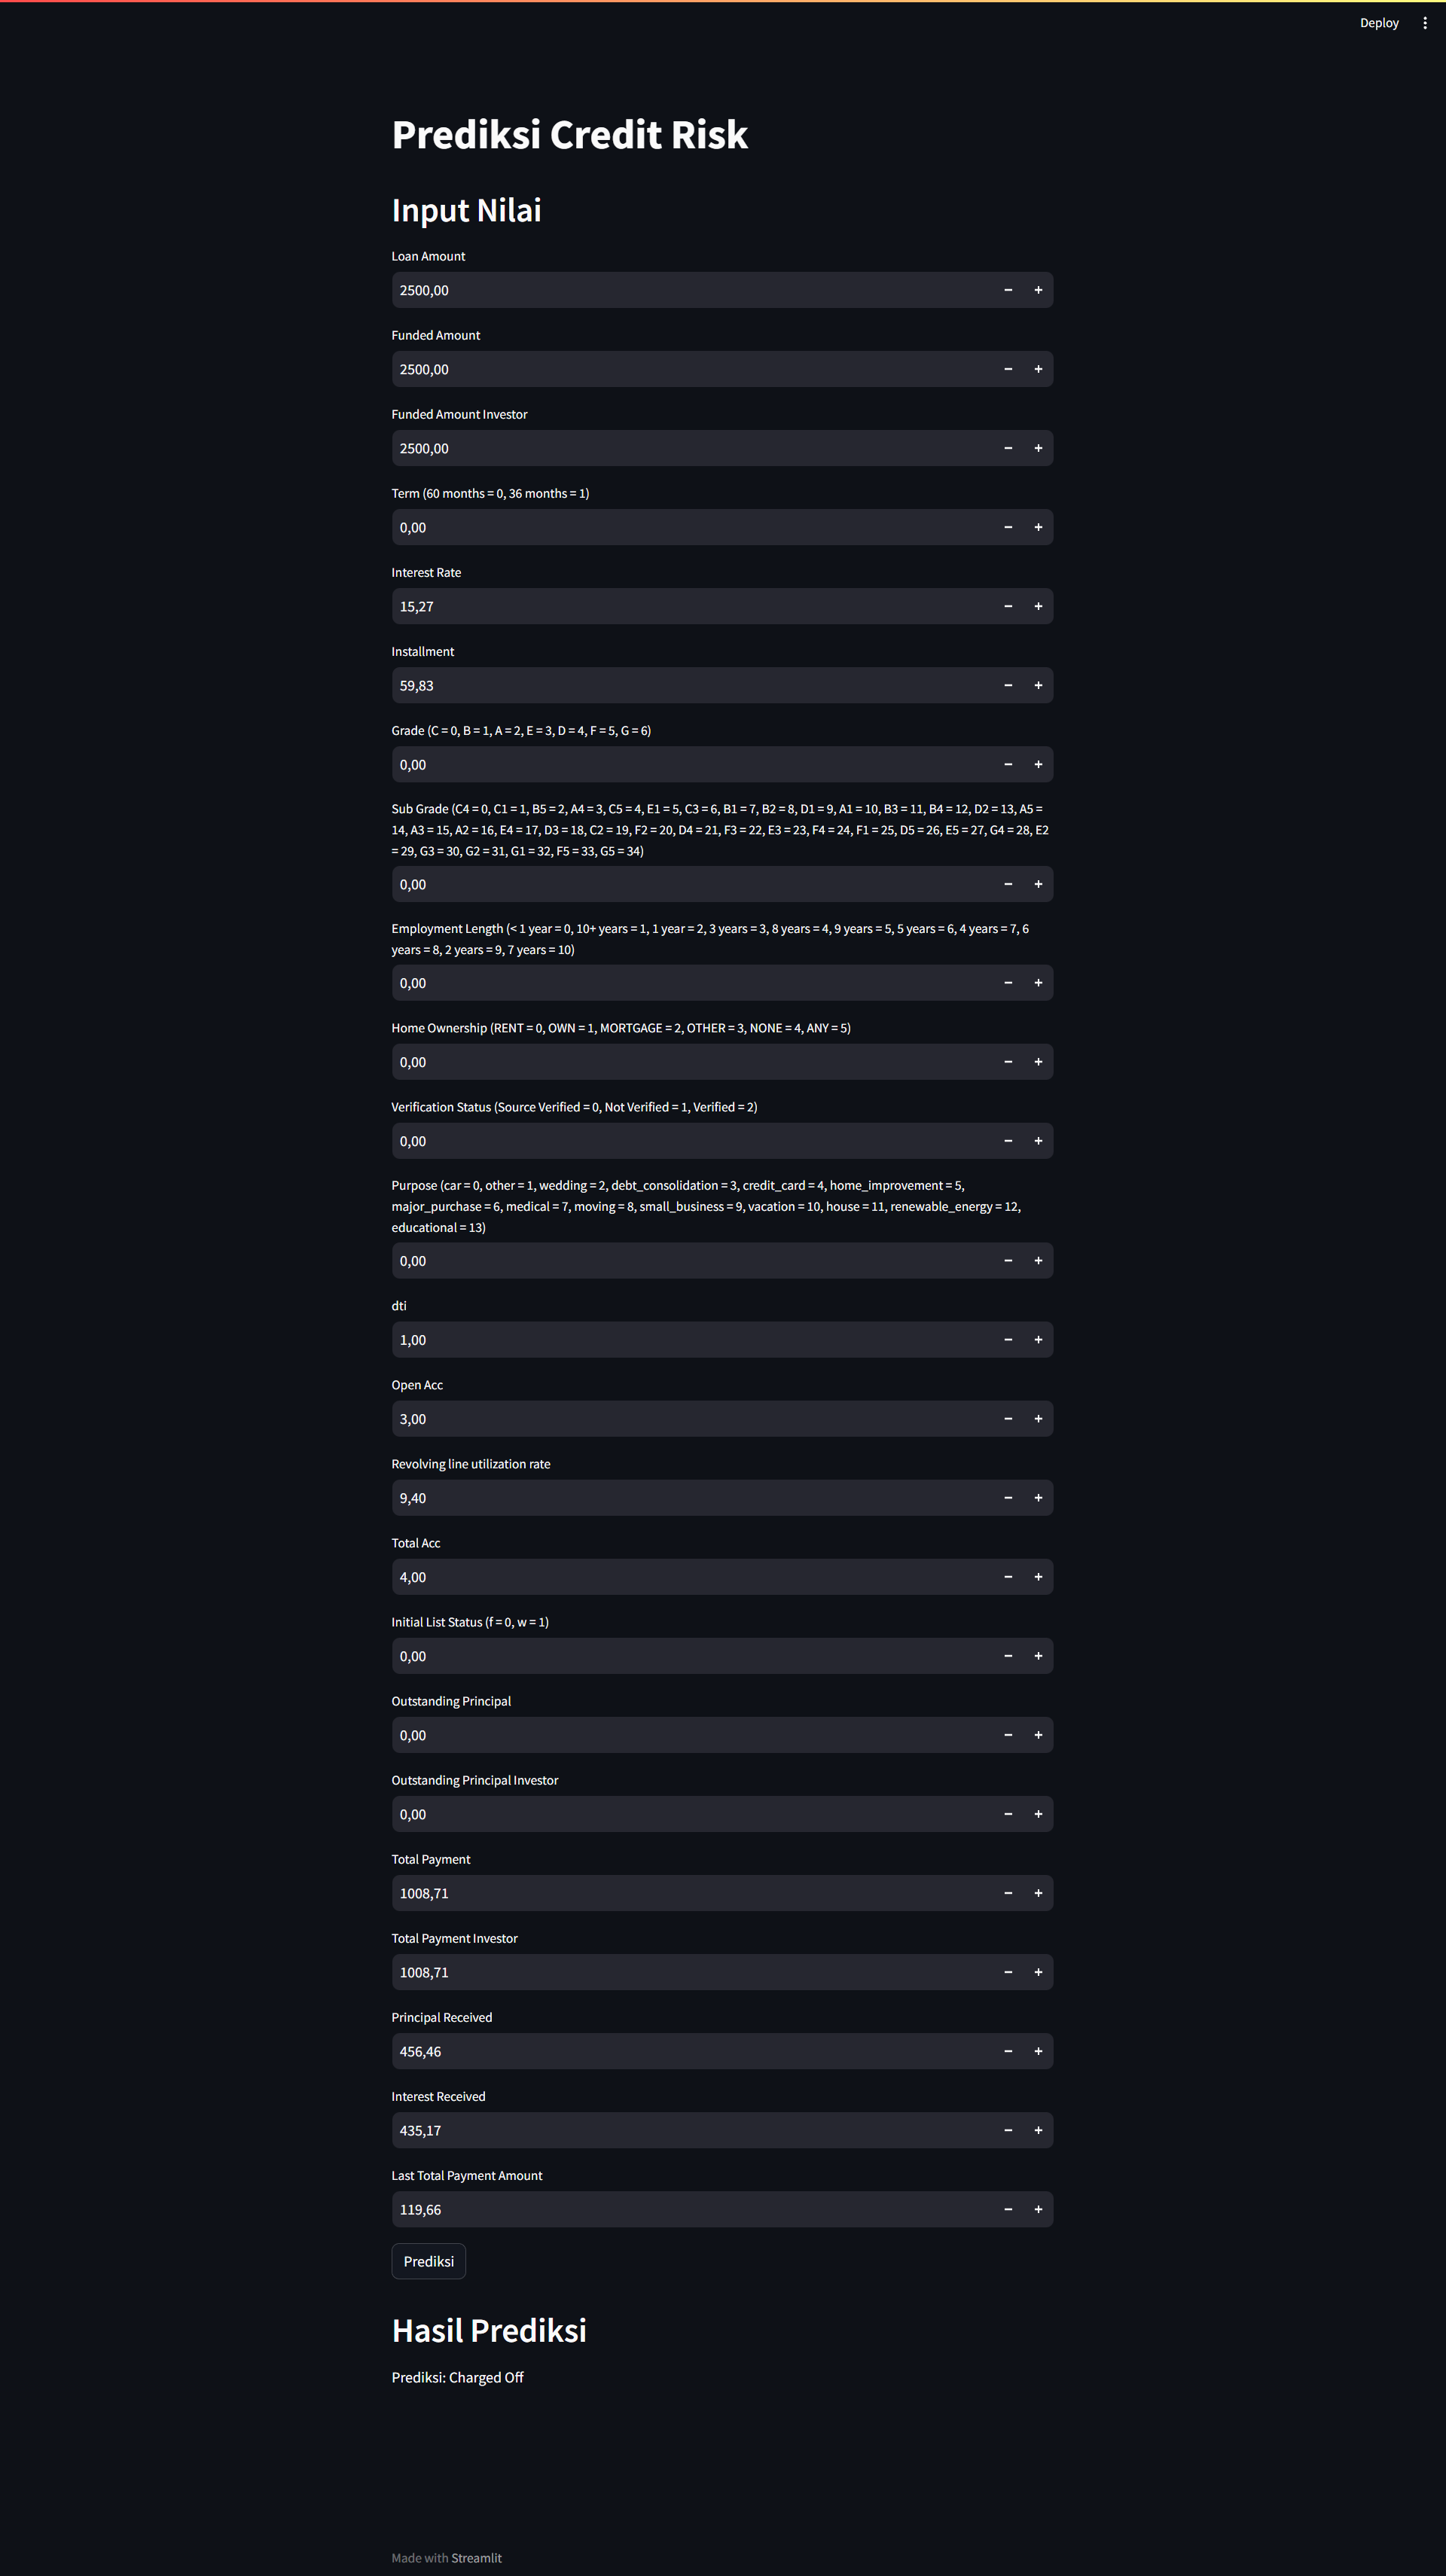